In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import util

import os

## Table of Contents

1. <a href=#missingness>Basic Data Reading and Missingness</a>

2. <a href=#by_type>Cats versus Dogs Missigness</a>

3. <a href=#tidying>Tidying Appropriate Columns</a>

4. <a href=#assessment>Assessing Types of Missingness and Imputation</a>

<a name='missingness'/>

### Basic Data Reading and Missingness 

Subsetting for cats and dogs. Dataset last updated 10/20/21.

https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw

In [2]:
shelter_data = pd.read_csv("sonoma_county_shelter_data.csv")
shelter_data = shelter_data[shelter_data["Type"].isin(["CAT", "DOG"])]
shelter_data.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,4/11/2014,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,7/24/2020,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,8/4/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,1/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1


In [3]:
shelter_data.describe()

,Days in Shelter,Outcome Zip Code,Count
count,20176.000000,17488.000000,20176.000000
mean,17.083515,94994.169145,0.997869
std,34.162210,3965.974323,0.046117
min,0.000000,1922.000000,0.000000
25%,1.000000,95401.000000,1.000000
50%,8.000000,95405.000000,1.000000
75%,21.000000,95436.000000,1.000000
max,1239.000000,99701.000000,1.000000


### Understanding Missingness of Data

In [4]:
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20176 entries, 0 to 21946
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  15724 non-null  object 
 1   Type                  20176 non-null  object 
 2   Breed                 20176 non-null  object 
 3   Color                 20176 non-null  object 
 4   Sex                   20176 non-null  object 
 5   Size                  20143 non-null  object 
 6   Date Of Birth         16021 non-null  object 
 7   Impound Number        20176 non-null  object 
 8   Kennel Number         20161 non-null  object 
 9   Animal ID             20176 non-null  object 
 10  Intake Date           20176 non-null  object 
 11  Outcome Date          20037 non-null  object 
 12  Days in Shelter       20176 non-null  int64  
 13  Intake Type           20176 non-null  object 
 14  Intake Subtype        20176 non-null  object 
 15  Outcome Type       

In [5]:
shelter_data.isna().sum()

Name                    4452
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      33
Date Of Birth           4155
Impound Number             0
Kennel Number             15
Animal ID                  0
Intake Date                0
Outcome Date             139
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             140
Outcome Subtype          337
Intake Condition           0
Outcome Condition        360
Intake Jurisdiction        0
Outcome Jurisdiction    2632
Outcome Zip Code        2688
Location                2688
Count                      0
dtype: int64

<AxesSubplot:>

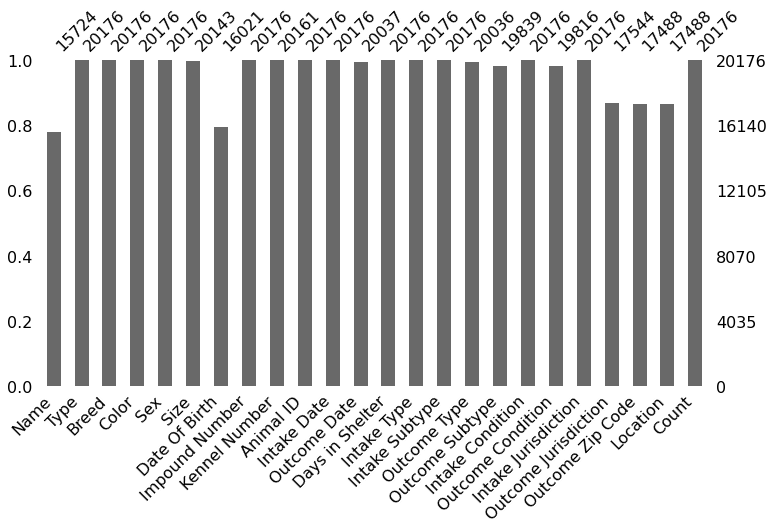

In [6]:
msno.bar(shelter_data, figsize=(12, 6))

<AxesSubplot:>

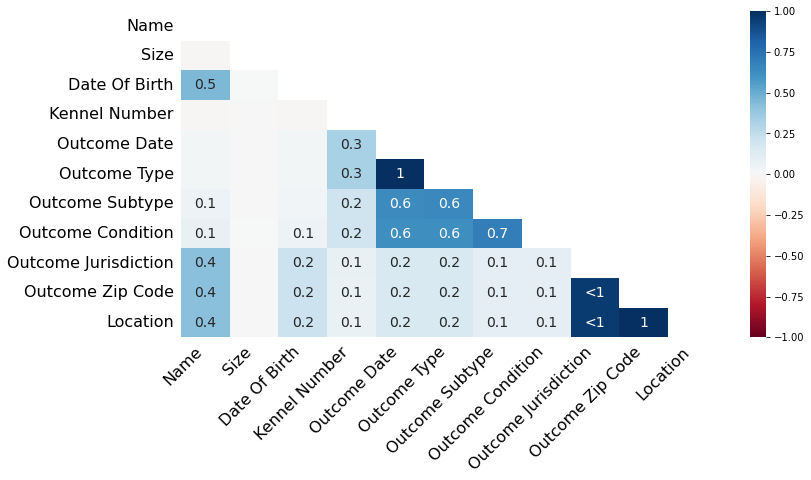

In [7]:
msno.heatmap(shelter_data, figsize=(12, 6))

<AxesSubplot:>

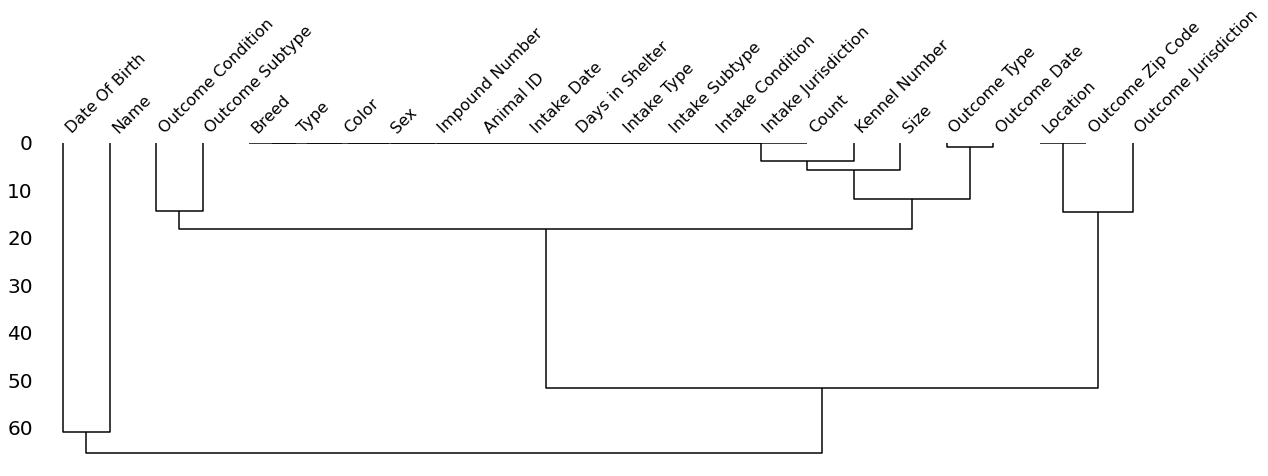

In [8]:
msno.dendrogram(shelter_data, figsize=(20, 6))

<a name='by_type' />

### Cat vs Dog (Missingness)

Understanding missingness for each of the two shelter animal species of interest.

In [9]:
cats = shelter_data[shelter_data["Type"] == "CAT"]
dogs = shelter_data[shelter_data["Type"] == "DOG"]

In [10]:
cats

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,8/4/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,1/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1
5,*ANDY,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,9/6/2020,K20-037580,WESTFARM,A401875,...,PHONE,ADOPTION,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95436.0,"95436(38.491884, -122.90672)",1
6,*ANNE,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,KITTN,9/6/2020,K20-037581,WESTFARM,A401876,...,PHONE,ADOPTION,WESTFARM,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95409.0,"95409(38.458965, -122.630156)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21940,*MISSY,CAT,DOMESTIC SH,BRN TABBY,Spayed,KITTN,7/29/2018,K18-029646,LOBBY,A375645,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.458384, -122.675588)",1
21941,NaN,CAT,DOMESTIC MH,BLACK/WHITE,Unknown,SMALL,NaN,K14-007796,CS05,A303038,...,OVER THE COUNTER,RETURN TO OWNER,RETURN TO OWNER,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1
21942,NaN,CAT,DOMESTIC SH,GRAY/WHITE,Female,SMALL,NaN,K19-031738,SMM,A385051,...,OVER THE COUNTER,EUTHANIZE,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
21943,NaN,CAT,DOMESTIC SH,GRAY,Unknown,KITTN,NaN,K18-027667,RECEIVING,A370465,...,COMM CAT,TRANSFER,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1


In [11]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7829 entries, 2 to 21946
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  4579 non-null   object 
 1   Type                  7829 non-null   object 
 2   Breed                 7829 non-null   object 
 3   Color                 7829 non-null   object 
 4   Sex                   7829 non-null   object 
 5   Size                  7827 non-null   object 
 6   Date Of Birth         5735 non-null   object 
 7   Impound Number        7829 non-null   object 
 8   Kennel Number         7822 non-null   object 
 9   Animal ID             7829 non-null   object 
 10  Intake Date           7829 non-null   object 
 11  Outcome Date          7782 non-null   object 
 12  Days in Shelter       7829 non-null   int64  
 13  Intake Type           7829 non-null   object 
 14  Intake Subtype        7829 non-null   object 
 15  Outcome Type        

In [12]:
cats.isna().sum()

Name                    3250
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                       2
Date Of Birth           2094
Impound Number             0
Kennel Number              7
Animal ID                  0
Intake Date                0
Outcome Date              47
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type              48
Outcome Subtype          138
Intake Condition           0
Outcome Condition        167
Intake Jurisdiction        0
Outcome Jurisdiction    1459
Outcome Zip Code        1460
Location                1460
Count                      0
dtype: int64

In [13]:
dogs.isna().sum()

Name                    1202
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      31
Date Of Birth           2061
Impound Number             0
Kennel Number              8
Animal ID                  0
Intake Date                0
Outcome Date              92
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type              92
Outcome Subtype          199
Intake Condition           0
Outcome Condition        193
Intake Jurisdiction        0
Outcome Jurisdiction    1173
Outcome Zip Code        1228
Location                1228
Count                      0
dtype: int64

<AxesSubplot:>

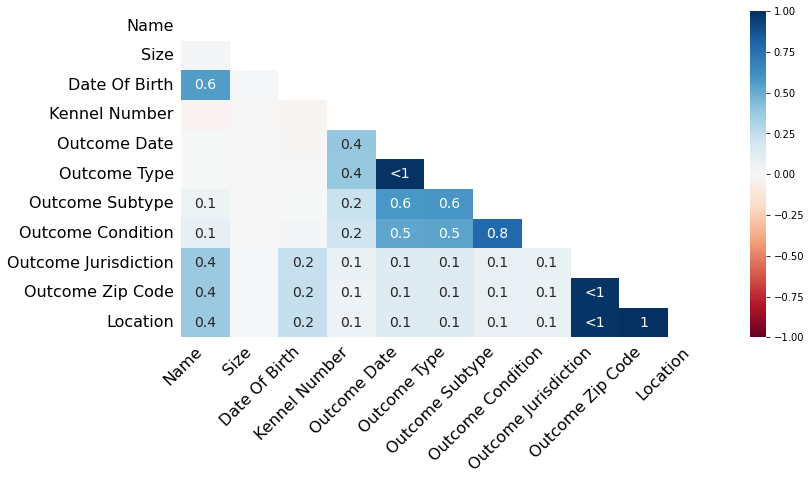

In [14]:
msno.heatmap(cats, figsize=(12, 6))

<AxesSubplot:>

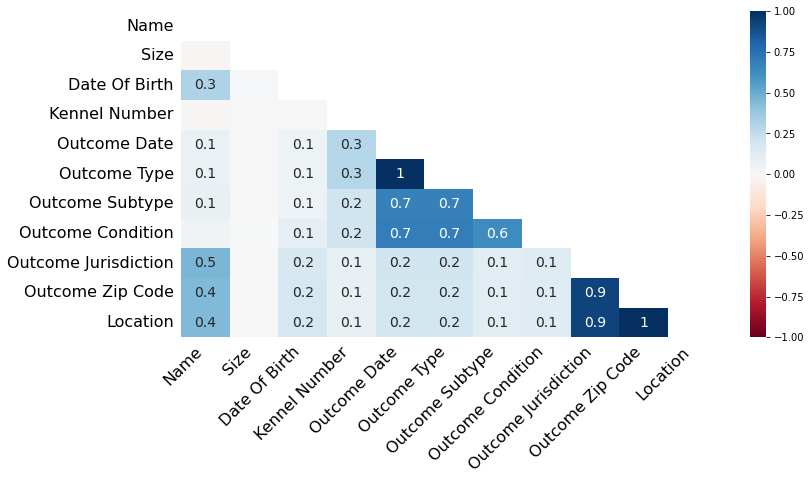

In [15]:
msno.heatmap(dogs, figsize=(12, 6))

In [16]:
shelter_data

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,4/11/2014,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,7/24/2020,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,8/4/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,1/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21942,NaN,CAT,DOMESTIC SH,GRAY/WHITE,Female,SMALL,NaN,K19-031738,SMM,A385051,...,OVER THE COUNTER,EUTHANIZE,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
21943,NaN,CAT,DOMESTIC SH,GRAY,Unknown,KITTN,NaN,K18-027667,RECEIVING,A370465,...,COMM CAT,TRANSFER,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1
21944,NaN,DOG,CHIHUAHUA LH/MIX,BLACK/WHITE,Male,TOY,2/3/2017,K18-027158,DA16,A367906,...,OVER THE COUNTER,TRANSFER,RP SHELTER,HEALTHY,HEALTHY,COUNTY,*ROHNERT PARK,94928.0,"94928(38.346718, -122.695947)",1
21945,ANDY,DOG,CHIHUAHUA LH/MIX,BROWN/WHITE,Neutered,TOY,4/24/2015,K17-022896,LOBBY,A349854,...,OVER THE COUNTER,ADOPTION,INTERNET,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94109.0,"94109(37.792737, -122.420971)",1


<a name='tidying' />

### Tidying Appropriate Columns

Cleaning appropriate columns to measure one variable per column. Also ensuring correct data types for analysis.

#### Fixing the "Sex" Column

Creating a separate indicator for whether or not the shelter animal was neutered/spayed.

In [17]:
sex = shelter_data["Sex"]
protected = (sex.mask(sex.isin(["Neutered", "Spayed"]), True)).where(sex.isin(["Neutered", "Spayed"]), False)
shelter_data.insert(5, "Protected", protected)

In [18]:
cats["Sex"].value_counts()

Neutered    2749
Spayed      2490
Unknown     1209
Female       783
Male         598
Name: Sex, dtype: int64

In [19]:
# Number of animals that have been Neutered/Spayed
shelter_data["Protected"].value_counts()

True     13328
False     6848
Name: Protected, dtype: int64

In [20]:
# Proportional Intake type based on missingness of Names colummn
shelter_data[shelter_data["Name"].isnull()]["Intake Type"].value_counts(normalize = True)

STRAY              0.908805
OWNER SURRENDER    0.030323
CONFISCATE         0.025382
QUARANTINE         0.015049
TRANSFER           0.014151
OS APPT            0.006289
Name: Intake Type, dtype: float64

In [21]:
# Convert Neutered/Spayed in sex column to Male/Female
shelter_data["Sex"] = sex.mask(sex.isin(["Neutered"]), "Male").mask(sex.isin(["Spayed"]), "Female")
# This leaves only Male, Female, and Unknown in Sex column
shelter_data[["Sex", "Protected"]]

,Sex,Protected
0,Female,False
1,Male,True
2,Male,True
3,Female,True
4,Male,True
...,...,...
21942,Female,False
21943,Unknown,False
21944,Male,False
21945,Male,True


#### Adding Datetime

Converting date-like columns to measurable datetime formats.

In [22]:
# Convert Date columns to datetime types
shelter_data["Date Of Birth"] = pd.to_datetime(shelter_data["Date Of Birth"])
shelter_data["Intake Date"] = pd.to_datetime(shelter_data["Intake Date"])
shelter_data["Outcome Date"] = pd.to_datetime(shelter_data["Outcome Date"])
shelter_data["Intake Date"].quantile(.87715)

Timestamp('2020-03-01 12:01:48')

#### Adding Animal Ages

In [23]:
today = pd.to_datetime("now")
shelter_data["Age"] = ((today - shelter_data["Date Of Birth"]).dt.days  / 365).round()

In [24]:
shelter_data["Before Covid"] = (pd.to_datetime("2020-03-04") - shelter_data["Intake Date"]).lt('0Days')

#### With regards to shelter data during lockdown...

In [25]:
# since we are considering data over the COVID timeline, we would like to see what percent of our data is before the 
# onset of COVID (March 2020).
print(shelter_data["Intake Date"].quantile(.8778))
1 - .8778
# It seems that approximately 12% of our data occurs during lockdown (which, in California, started
# on the 4th of March 2020, when the governor of California declared a state of emergency) due to COVID

2020-03-04 00:00:00


0.12219999999999998

#### Adding column for if animal was named by shelter

In [26]:
# Since asterisks included in Name designates an animal as being named by the shelter, we create a column
# "Named by Shelter" (boolean type) to tidy the data. Next, we remove the asterisks from names.
shelter_data.insert(1, 'Named by Shelter', shelter_data['Name'].astype(str).str.contains("\*"))
shelter_data["Name"] = shelter_data["Name"].str.replace("*", "", regex = True)
shelter_data

,Name,Named by Shelter,Type,Breed,Color,Sex,Protected,Size,Date Of Birth,Impound Number,...,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Age,Before Covid
0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,2014-04-11,K21-039564,...,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,8.0,True
1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,2020-07-24,K21-039133,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1,1.0,True
2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,2019-08-04,K21-039232,...,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1,2.0,True
3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,2020-10-27,K21-037796,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1,1.0,True
4,MERLIN,True,CAT,DOMESTIC SH,BRN TABBY,Male,True,SMALL,2018-01-16,K21-037709,...,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1,4.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21942,NaN,False,CAT,DOMESTIC SH,GRAY/WHITE,Female,False,SMALL,NaT,K19-031738,...,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1,NaN,False
21943,NaN,False,CAT,DOMESTIC SH,GRAY,Unknown,False,KITTN,NaT,K18-027667,...,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1,NaN,False
21944,NaN,False,DOG,CHIHUAHUA LH/MIX,BLACK/WHITE,Male,False,TOY,2017-02-03,K18-027158,...,RP SHELTER,HEALTHY,HEALTHY,COUNTY,*ROHNERT PARK,94928.0,"94928(38.346718, -122.695947)",1,5.0,False
21945,ANDY,False,DOG,CHIHUAHUA LH/MIX,BROWN/WHITE,Male,True,TOY,2015-04-24,K17-022896,...,INTERNET,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94109.0,"94109(37.792737, -122.420971)",1,7.0,False


<a name='assessment' />

### Assessing Types of Missingness and Imputation

Assessing relationships between columns for missigness and considering imputation strategies.

Note: will probably have to do within-groups probabilistic imputation.

In [27]:
shelter_data.isna().sum()

Name                    4452
Named by Shelter           0
Type                       0
Breed                      0
Color                      0
Sex                        0
Protected                  0
Size                      33
Date Of Birth           4155
Impound Number             0
Kennel Number             15
Animal ID                  0
Intake Date                0
Outcome Date             139
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             140
Outcome Subtype          337
Intake Condition           0
Outcome Condition        360
Intake Jurisdiction        0
Outcome Jurisdiction    2632
Outcome Zip Code        2688
Location                2688
Count                      0
Age                     4155
Before Covid               0
dtype: int64

In [28]:
# Determine whether or not the missingness of the "Age" column is dependent on the "Intake Type" Column. We speculate
# that the Age of the animal is extremely likely to be missing if an animal is found by the shelter, leaving the Age
# often unknown.

ageisnull = shelter_data.assign(isnull = shelter_data["Age"].isnull())
test_stats, obs = util.permutation_test(ageisnull, "Intake Type", "isnull", util.tvd, 500)

ValueError: No axis named 500 for object type DataFrame

In [ ]:
util.calc_pvalue(test_stats, obs)

With a p-value of ~0, it is extremely likely that missingness of Age is dependent on the Intake Type of the animal.

In [ ]:
# Determine whether or not the missingness of the "Kennel Number" column is dependent on the "Days in Shelter" Column.
# We speculate that the Age of the animal is extremely likely to be missing if an animal is found by the shelter, leaving the Age
# often unknown.

kennelisnull = shelter_data.assign(isnull = shelter_data["Kennel Number"].isnull())
test_stats, obs = util.permutation_test(kennelisnull, "Days in Shelter", "isnull", util.diff_in_means, 500)

In [ ]:
util.calc_pvalue(test_stats, obs)

If we are considering our significance level to be 0.05, with a p-value of 0.028, we reject the null hypothesis. It is very likely that the missingness of Kennel Number is dependent on the amount of days that the animal is in the shelter.

In [ ]:
# Now impute using probabilistic imputation (within groups)

In [ ]:
intake_types = shelter_data["Intake Type"].unique()

In [ ]:
intake = intake_types[0]
intake

In [ ]:
shelter_copy = shelter_data.copy()
for intake in intake_types:
    num_null = shelter_data[shelter_data["Intake Type"] == intake]["Age"].isnull().sum()
    fill_values = shelter_data[shelter_data["Intake Type"] == intake]["Age"].dropna().sample(num_null, replace=True)
    missing_index = shelter_data[(shelter_data["Intake Type"] == intake) & (shelter_data["Age"].isnull())].index
    fill_values.index = missing_index
    shelter_copy["Age"].update(fill_values)

In [ ]:
shelter_data["Age"].isna().sum()

In [ ]:
shelter_data.iloc[9]

NOTE: Obvious confound for age is the breed of the dog (for example small dogs generally live longer, therefore what we should do is within groups also per breed)

In [ ]:
breeds = shelter_data["Breed"].value_counts().index
shelter_data

In [ ]:
# Account for breeds
for breed in breeds:
    for intake in intake_types:
        num_null = shelter_data[(shelter_data["Intake Type"] == intake) & (
            shelter_data["Breed"] == breed)]["Age"].isnull().sum()
        try:
            fill_values = shelter_data[(shelter_data["Intake Type"] == intake) & (
                shelter_data["Breed"] == breed)]["Age"].dropna().sample(num_null, replace=True)
            missing_index = shelter_data[(shelter_data["Intake Type"] == intake) & (
                shelter_data["Breed"] == breed) & (shelter_data["Age"].isnull())].index
            fill_values.index = missing_index
            shelter_data["Age"].update(fill_values)
        except:
            print(f"Breed: {breed}, Intake Type: {intake}")

In [ ]:
# Since there are many breeds that do not have samples with every intake type outcome, we cannot probabilistically
# impute each breed/intake type comparison. These breed/intake type comibations are printed above. Most breeds printed
# are combinations of breeds, so it is not surprising that we see 0 animals with these combinations.
shelter_data["Age"].isna().sum()
# We only have 118 missing ages now, compared to the 4155 missing ages we had at first. Therefore we have accounted 
# for 97.2% of the missing ages, which is sufficent enough for our imputation. 

In [ ]:
shelter_data.iloc[9]
# As we can see, this previously missing german shepard's age looks more appropriate now that we have dealt with
# the breed confounder

In [ ]:
shelter_data.to_csv("shelter_cleaned.csv")